In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 이미지 이진화 (Adaptive Thresholding)<br>
https://opencv-python.readthedocs.io/en/latest/doc/09.imageThresholding/imageThresholding.html

In [2]:
image_grey = cv2.imread('./song.png', cv2.IMREAD_GRAYSCALE)

max_output_value = 255 
neighborhood_size = 99
subtract_from_mean = 10

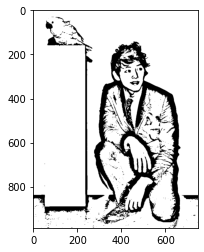

In [3]:
# ADAPTIVE_THRESH_GAUSSIAN_C
image_binarized = cv2.adaptiveThreshold(image_grey, max_output_value,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, neighborhood_size,
                                       subtract_from_mean)
plt.imshow(image_binarized, cmap='gray')
plt.show()

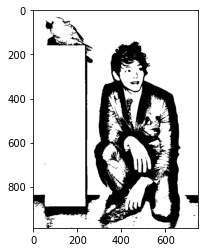

In [4]:
# ADAPTIVE_THRESH_MEAN_C
image_binarized = cv2.adaptiveThreshold(image_grey, max_output_value,
                                       cv2.ADAPTIVE_THRESH_MEAN_C,
                                       cv2.THRESH_BINARY, neighborhood_size,
                                       subtract_from_mean)
plt.imshow(image_binarized, cmap='gray')
plt.show()

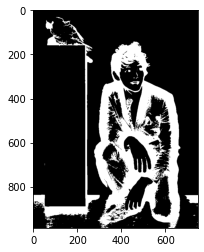

In [5]:
# THRESH_BINARY_INV
image_binarized = cv2.adaptiveThreshold(image_grey, max_output_value,
                                       cv2.ADAPTIVE_THRESH_MEAN_C,
                                       cv2.THRESH_BINARY_INV, neighborhood_size,
                                       subtract_from_mean)
plt.imshow(image_binarized, cmap='gray')
plt.show()

### 배경 지우기 (GrabCut 알고리즘)<br>
https://deep-learning-study.tistory.com/240

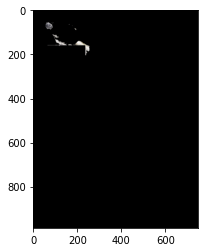

In [6]:
image_bgr = cv2.imread('./song.png')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
rectangle = (0, 56, 256, 150)
mask = np.zeros(image_rgb.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

cv2.grabCut(image_rgb, mask,rectangle,bgdModel,fgdModel,5, cv2.GC_INIT_WITH_RECT) 
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]
plt.imshow(image_rgb_nobg)
plt.show()

### 경계선 찾기 (Canny 알고리즘)

235.0


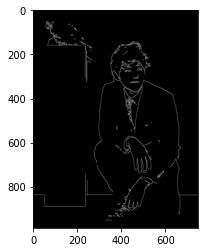

In [7]:
image_gray = cv2.imread('./song.png', cv2.IMREAD_GRAYSCALE)

median_intensity = np.median(image_gray)  # 이미지 컬러값의 중간값
print(median_intensity)

lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

plt.imshow(image_canny, cmap='gray')
plt.show()

### Convex Hull (Contour)

In [8]:
from PIL import Image

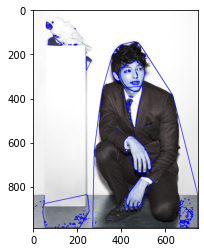

In [9]:
src = cv2.imread("./song.png")
dst = src.copy()
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in contours:
    hull = cv2.convexHull(i, clockwise=True)
    cv2.drawContours(dst, [hull], 0, (0, 0, 255), 2)
image_from_array = Image.fromarray(dst)
plt.imshow(image_from_array)
plt.show()

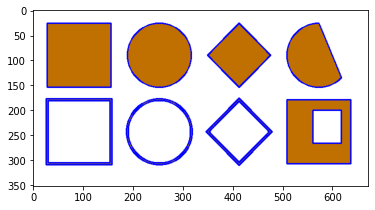

In [10]:
src = cv2.imread("./1.png")
dst = src.copy()
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in contours:
    hull = cv2.convexHull(i, clockwise=True)
    cv2.drawContours(dst, [hull], 0, (0, 0, 255), 2)
image_from_array = Image.fromarray(dst)
plt.imshow(image_from_array)
plt.show()

### 얼굴 검출 (Haar Cascades)<br>
https://m.blog.naver.com/pk3152/221449668487

In [11]:
!curl -L -o ./haarcascade_frontalface_default.xml https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  908k  100  908k    0     0   763k      0  0:00:01  0:00:01 --:--:--  763k


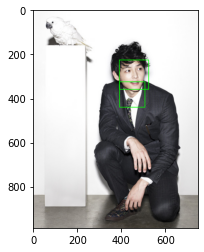

In [12]:
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
img_source = "./song.png"
img = cv2.imread(img_source)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, 
                                     minSize=(30, 30),)

for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
img_convert = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image_from_array = Image.fromarray(img_convert)
plt.imshow(image_from_array)
plt.show()

In [13]:
!curl -L -o ./haarcascade_eye.xml https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  333k  100  333k    0     0   652k      0 --:--:-- --:--:-- --:--:--  652k


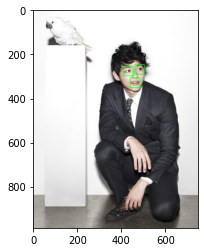

In [14]:
eyeCascade = cv2.CascadeClassifier("haarcascade_eye.xml")
img_source = "./song.png"
img = cv2.imread(img_source)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, 
                                     minSize=(30, 30),)

for (x, y, w, h) in eyes:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
img_convert = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image_from_array = Image.fromarray(img_convert)
plt.imshow(image_from_array)
plt.show()